![](https://i.imgur.com/JsMvGnP.png)

# Projeto - Classificação

## 1. Considerações iniciais

Neste notebook iremos praticar a construção de um modelo de Machine Learning. Na atividade, iremos utilizar um algoritmo para realizar um processo de classificação. 

Como o foco da atividade será percorrer o fluxo do Aprendizado de Máquina por inteiro (ou o máximo dele), evitaremos, propositalmente, adentrar em algoritmos e explicações mais complexas.


### 1.1. O Problema de Negócio

A _churn rate_ (taxa de rotatividade ou cancelamento) é a porcentagem de assinantes que interrompem suas assinaturas de um serviço dentro de um determinado período de tempo. Para uma empresa expandir sua clientela, sua taxa de crescimento, medida pelo número de novos clientes, deve exceder sua taxa de cancelamento (_churn rate_).

Portanto, neste projeto, um banco deseja que você construa um modelo de Machine Learning que possa prever a probabilidade de seus clientes atuais fecharem suas contas em um futuro próximo e, portanto, calcular sua _churn rate_.

Esse é um problema de classificação no qual você classifica se um cliente irá sair (y=1) ou permanecer (y=0) com base diversos atributos.

### 1.2. Descrição do dados

Os dados necessários podem ser encontrados no [repositório da atividade](https://github.com/awarischool/br-classification-project). No arquivo *Churn_Modelling.csv* você encontrará:
- **RowNumber**: id do registro/linha.
- **CustomerId**: identificador único do cliente.
- **Surname**: sobrenome do cliente.
- **CreditScore**: pontuação de crédito do cliente.
- **Geography**: país de origem do cliente.
- **Gender**: sexo do cliente.
- **Age**: idade do cliente.
- **Tenure**: número de anos em que o cliente está com o banco.
- **Balance**: saldo bancário.
- **NumOfProducts**: número de produtos que o cliente utiliza.
- **HasCrCard**: indica se o cliente tem (1) ou não tem (0) cartão de crédito.
- **IsActiveMember**: indica se o cliente é (1) ou não é (0) ativo no banco.
- **EstimatedSalary**: salário estimado em dólares.
- **Exited**: indica se o cliente encerrou (1) a conta no banco ou se o cliente foi retido (0).


### 1.3 Métricas de Avaliação

Avalie seu modelo utilizando as métricas Acurácia e AUC (area under the ROC) estudadas nos módulos anteriores.

Trabalhe até conseguir uma acurácia acima e 85%.

## 2. Etapas do Projeto

Neste projeto você poderá seguir o fluxo que preferir, mas como sugestão pode seguir as seguintes etapas:
1. Análise exploratória 
2. Preparação e limpeza dos dados
3. Seleção de atributos
4. Construção do modelo
5. Avaliação do modelo
6. Otimização do modelo

Lembrando que esses passos, provavelmente, serão executados várias vezes até se obter um resultado satisfatório.

Sugestões de modelos:
* Logistic Regression Classification
* K-Nearest Neighbour (KNN) Classification
* Support Vector Machine (SVM) Classification
* Naive Bayes Classification
* Decision Tree Classification
* Random Forest Classification

Em caso de dúvidas, não esqueça de conversar com seu mentor.

## 3. Desenvolvimento do Projeto

In [54]:
# Importando bibliotecas necessárias para o projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings("ignore")

### 3.1 Análise exploratória

In [28]:
# Carregando conjunto de dados.
url = 'https://raw.githubusercontent.com/viniciusacosta/br-classification-project/master/Churn_Modelling.csv'
churn = pd.read_csv(url)

In [29]:
# Exibindo as primeiras linhas do DataFrame
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [30]:
# Transformando todas as letras das colunas em minúsculas.
churn.columns = churn.columns.str.lower()

# Resultado da transformação
churn.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [31]:
# Verificando as dimensões do dataset.
churn.shape

(10000, 14)

Verificamos a existência de **14 variáveis**, e **10000 observações** dentro do dataset.

In [32]:
# Verificando o número de registros duplicados.
churn.duplicated().sum()

0

**Não há registros duplicados** dentro do conjunto de dados.

In [33]:
# Verificando o número de NAs existentes dentro do dataset.
churn.isna().sum()

rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

**Não há valores nulos** dentro do conjunto de dados.

In [34]:
# Contabilizando o número de valores únicos em cada variável do dataset.
info = churn.nunique().sort_values()

# Determinando o tipo de dado de cada uma das variáveis do dataset.
info = pd.DataFrame(info.values, index = info.index, columns = ['NUniques'])

# Atribuindo informações sobre o tipo de dado das variáveis ao DataFrame.
info['dtypes'] = churn.dtypes

# Exibindo Dataframe.
info

,NUniques,dtypes
gender,2,object
hascrcard,2,int64
isactivemember,2,int64
exited,2,int64
geography,3,object
numofproducts,4,int64
tenure,11,int64
age,70,int64
creditscore,460,int64
surname,2932,object


Grande parte das variáveis númericas apresentam um grande número de valores únicos.

In [35]:
# Eliminando a variáveis desnecessárias do conjunto de dados.
churn = churn.drop(columns = ['rownumber', 'customerid', 'surname'])

In [36]:
# Verificando dados estatísticos descritivos
churn.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
creditscore,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
tenure,10000.0,5.01,2.89,0.00,3.00,5.00,7.00,10.00
balance,10000.0,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
numofproducts,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
hascrcard,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
isactivemember,10000.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
estimatedsalary,10000.0,100090.24,57510.49,11.58,51002.11,100193.92,149388.25,199992.48
exited,10000.0,0.20,0.40,0.00,0.00,0.00,0.00,1.00


De acordo com a tabela, podemos perceber uma possivel presença de outliers na variável **balance**.

In [37]:
# Separando as features categóricas das númericas
feat_num = ['creditscore', 'age', 'tenure', 'balance', 'estimatedsalary', 'numofproducts']
feat_cat = ['geography',  'gender', 'hascrcard', 'numofproducts', 'isactivemember']

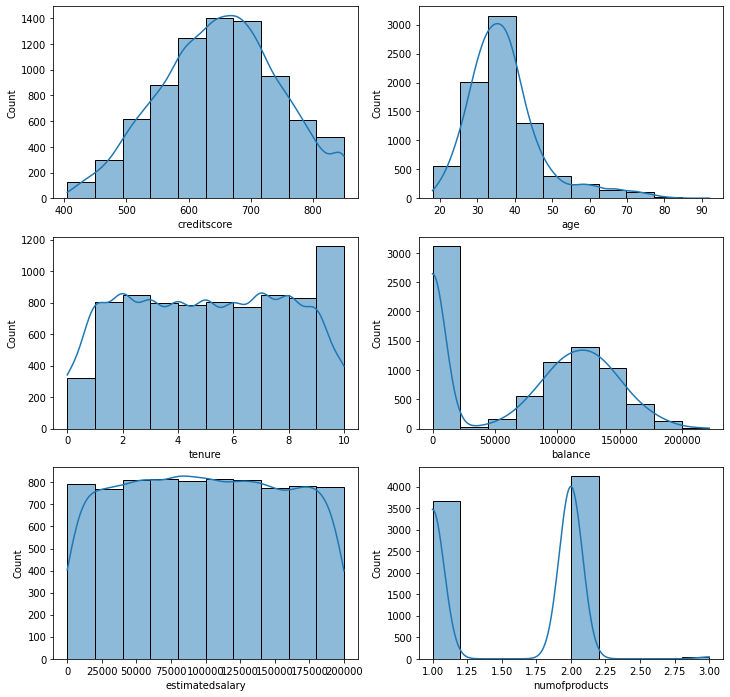

In [39]:
# Histograma para cada variável númerica
## Criando subplots
n_rows=3
n_cols=2
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(12, 12)

## Plottando histogramas
for i, column in enumerate(feat_num):
  sns.histplot(churn[column], ax=axes[i//n_cols,i%n_cols], bins=10, kde=True)

plt.show()

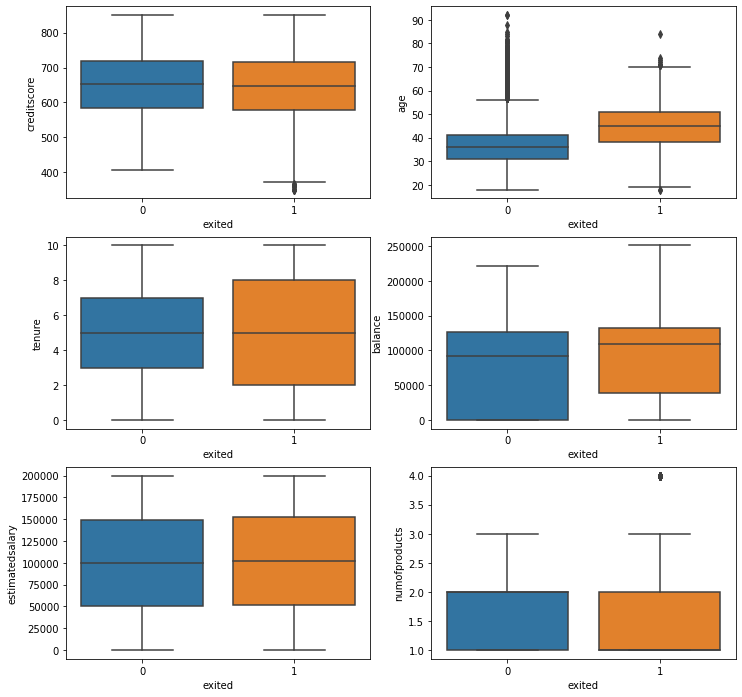

In [40]:
# Boxplot para cada variável numérica
## Criando subplots
n_rows=3
n_cols=2
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(12, 12)

## Plottando boxplots
for i, column in enumerate(feat_num):
  sns.boxplot(x=churn['exited'], y=churn[column], ax=axes[i//n_cols,i%n_cols])

plt.show()

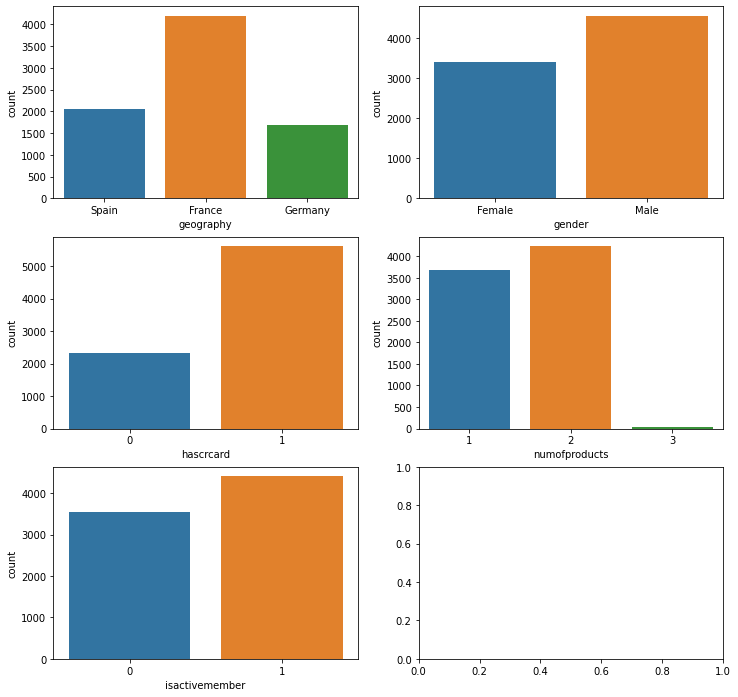

In [38]:
# Contablização dos clientes que cancelaram suas contas para cada variavel catégorica
## Criando subplots
n_rows=3
n_cols=2
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(12, 12)

## Plottando gráficos de barra
for i, column in enumerate(feat_cat):
  data = churn[[column, 'exited']]
  data = data[data['exited'] == 0]
  sns.countplot(x=data[column], ax=axes[i//n_cols,i%n_cols])

plt.show()

Podemos perceber que a maioria dos clientes que cancelaram suas contas são **homens franceses**, com cartão de crédito e que utilizam no máximo **2 produtos.**

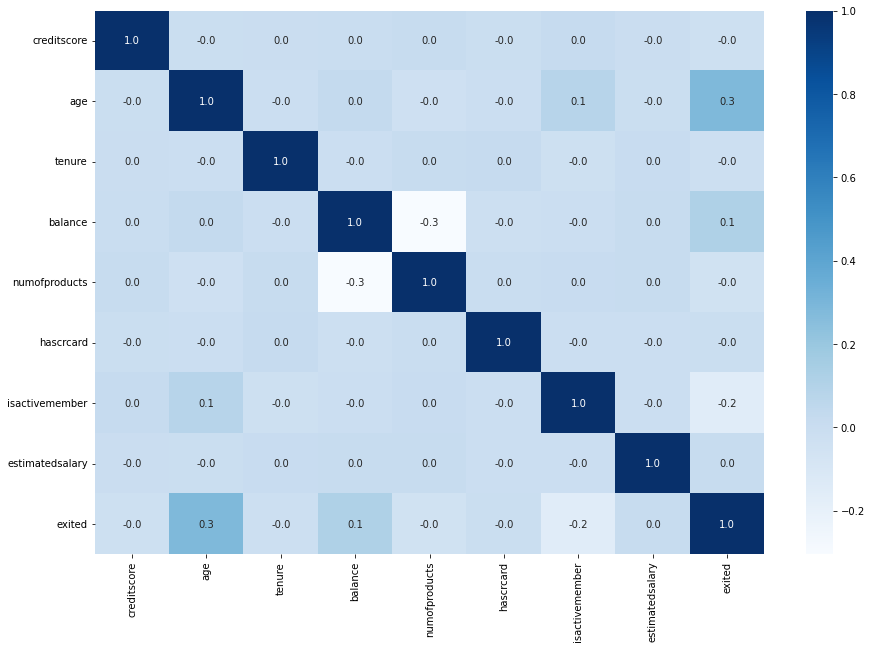

In [41]:
#Verificando correlações das variáveis numéricas
plt.figure(figsize=(15,10))
sns.heatmap(churn.corr(), annot=True, fmt='.1f', cmap='Blues')
plt.show()

Não há muita relação de nossa variável target (**exited**) com as outras variáveis, com excessão da idade entretando ainda trata-se de uma correlação positiva bastante fraca, que pode impactar negativamente na aplicação dos modelos.


### 3.2 Preparação e limpeza dos dados

In [42]:
# OneHotEncoding
## Variável geography
churn = pd.get_dummies(churn, columns=['geography'])
churn.columns = churn.columns.str.lower()

# Transformando coluna gender para valores númericos
churn['gender'] = churn['gender'].map({'Female':1, 'Male':0})

In [44]:
# Normalização dos dados
var = ['creditscore', 'age', 'tenure', 'balance', 'estimatedsalary']
z_score = StandardScaler()

for col in var:
  churn[col] = z_score.fit_transform(churn[[col]])

churn.head()

,creditscore,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_france,geography_germany,geography_spain
0,-0.326221,1,0.293517,-1.041760,-1.225848,1,1,1,0.021886,1,1,0,0
1,-0.440036,1,0.198164,-1.387538,0.117350,1,0,1,0.216534,0,0,0,1
2,-1.536794,1,0.293517,1.032908,1.333053,3,1,0,0.240687,1,1,0,0
3,0.501521,1,0.007457,-1.387538,-1.225848,2,0,0,-0.108918,0,1,0,0
4,2.063884,1,0.388871,-1.041760,0.785728,1,1,1,-0.365276,0,0,0,1


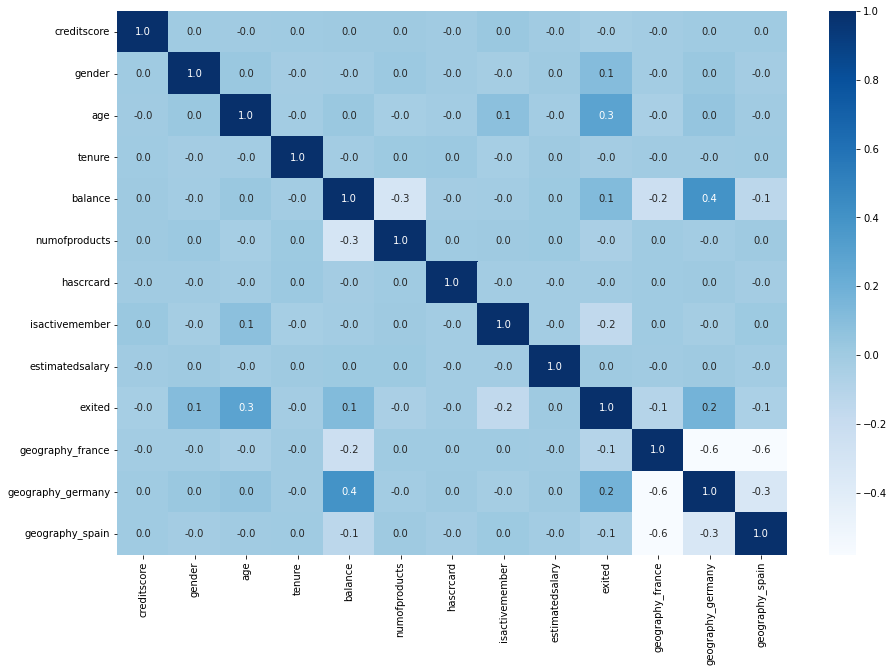

In [43]:
#Verificando correlações das variáveis numericas
plt.figure(figsize=(15,10))
sns.heatmap(churn.corr(), annot=True, fmt='.1f', cmap='Blues')

### 3.3 Seleção de atributos

In [45]:
X = churn.drop('exited', axis=1) 
y = churn['exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

### 3.4 Construção do modelo

In [47]:
modelos = [DecisionTreeClassifier(),  
           RandomForestClassifier(),  
           LogisticRegression(),  
           SVC(), 
           GaussianNB(),  
           MLPClassifier()  
           ]

In [48]:
result = {
    'Modelo': [],
    'train_acuracy': [],
    'test_acuracy': [],
    'cv_score_mean':[]
}

In [49]:
for model in modelos:
  model.fit(X_train, y_train)

  train_acuracy = model.score(X_train, y_train)
  test_acuracy = model.score(X_test, y_test)
  cv_scores = cross_val_score(model, X_train, y_train)

  result['Modelo'].append(model.__class__.__name__)
  result['train_acuracy'].append(train_acuracy)
  result['test_acuracy'].append(test_acuracy)
  result['cv_score_mean'].append(np.mean(cv_scores))

### 3.5 Avaliação do modelo

In [50]:
result = pd.DataFrame(result)
result.sort_values(by='cv_score_mean', ascending=False)

,Modelo,train_acuracy,test_acuracy,cv_score_mean
1,RandomForestClassifier,0.999867,0.8672,0.858800
5,MLPClassifier,0.875067,0.8704,0.857467
3,SVC,0.861733,0.8624,0.851467
4,GaussianNB,0.818533,0.8176,0.817067
2,LogisticRegression,0.807467,0.8176,0.806000
0,DecisionTreeClassifier,1.000000,0.7912,0.787333


O modelo com maior performance geral foi o **RandomForestClassifier.**

Acurácia: 86.88%
AUC: 72.73045285693512%


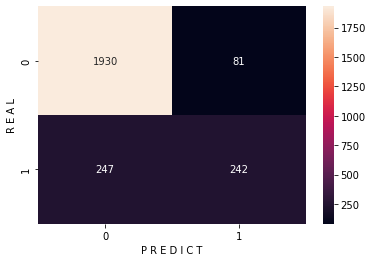

In [62]:
rfc = RandomForestClassifier()
yHat = rfc.fit(X_train, y_train).predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, yHat) * 100

# AUC
roc_auc = roc_auc_score(y_test, yHat) * 100

# Printando os resultados
print(f'Acurácia: {accuracy}%')
print(f'AUC: {roc_auc}%')

# Plottando matriz de confusão
cmf = confusion_matrix(y_test, yHat)
sns.heatmap(pd.DataFrame(cmf), annot=True, fmt='g')
plt.xlabel('P R E D I C T')
plt.ylabel('R E A L')
plt.show()

### 3.4 Otimização do modelo

In [ ]:
# Instanciando parâmetros
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

grid = GridSearchCV(rfc, param_grid).fit(X_train, y_train)

print(f' Melhores parâmetros: {grid.best_params_}')
print(f'Melhor Score: {grid.best_score_}')

## 4. Conclusão
O fluxo de trabalho de Aprendizado de Máquina não termina após a avaliação de performance do modelo escolhido. Na verdade, esta seria somente a primeira iteração de um processo que pode ter dezenas de tentativas.

Encorajamos você a repetir novamente o processo descrito neste notebook. Contudo, explorando novas possibilidades para verificar a melhora/piora da performance do seu modelo. 

Você pode, por exemplo, remover variáveis/atributos menos importantes, normalizar variáveis importantes e escolher outros algoritmos de aprendizagem supervisionada. O Aprendizado de Máquina é uma área interessante justamente por causa disto. Você testa, você erra, você recomeça.